# Traffic Signs Classification Project

In cities, public services are being enhanced by using the data collected from sensors and IoT. Traffic systems are capable of processing and analyzing a variety of data types, including images and videos. The systems with the aid of computer vision techniques are able to recognize objects in images and video from traffic cameras, by breaking them into identifying features, and matching them to classes.This can allow a self-driving car to make important decision since one of the main problems for self-driving cars is being able to classify an image of a traffic sign since they are in different shapes and sizes. 

# Chinese Data set

In [1]:
# Importing Libraries
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import math


data_path = r'Chinese'
train_path = os.path.join(data_path, 'TsignRecgTrain4170Annotation.csv')
test_path = os.path.join(data_path, 'TsignRecgTest1994Annotation.csv')

labels = ['5', '15', '30', '40', '50', '60', '70', '80', 'no entry', 'no straight road', 
         '10', '11', '12', '13', '14', '15', '16', '18', '19',
         '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', 
         '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 
         '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', 
         '50', '51', '52', '53', '54', '55', '56', '57',]


In [53]:
labels = ['5km', '15km', '30km', '40km', '50km', '60km', '70km', '80km', 'no entry', 'no straight road', 
         '10', '11', '12', '13', '14', '15', '16', '18', '19',
         '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', 
         '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 
         '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', 
         '50', '51', '52', '53', '54', '55', '56', '57',]


In [2]:
test_color = '#630f8e'
train_color = '#0f7b8e'
trainDf = pd.read_csv(train_path)
testDf = pd.read_csv(test_path)
    
trainDf['Path'] = list(map(lambda x: os.path.join(data_path,'TSRD-Train/'+ x.lower() ), trainDf['filename']))
testDf['Path'] = list(map(lambda x: os.path.join(data_path,'TSRD-Test/'+ x.lower() ), testDf['filename']))

trainDf.sample(5)

,filename,width,height,x1,y1,x2,y2,category,Path
3493,014_1_0058.png,161,141,17,12,152,125,14,Chinese/TSRD-Train/014_1_0058.png
2842,037_1_0006_1_j.png,121,115,24,28,88,87,37,Chinese/TSRD-Train/037_1_0006_1_j.png
2356,007_1_0007.png,150,129,19,10,133,118,7,Chinese/TSRD-Train/007_1_0007.png
2804,035_1_0047.png,127,130,20,21,116,104,35,Chinese/TSRD-Train/035_1_0047.png
1669,028_0133.png,207,180,37,35,159,158,28,Chinese/TSRD-Train/028_0133.png


In [3]:
testDf.sample(5)

,filename,width,height,x1,y1,x2,y2,category,Path
677,038_0008_j.png,131,110,28,25,86,80,38,Chinese/TSRD-Test/038_0008_j.png
1183,010_1_0002_1_j.png,97,98,6,6,88,90,10,Chinese/TSRD-Test/010_1_0002_1_j.png
531,026_0061_j.png,69,67,19,21,41,45,26,Chinese/TSRD-Test/026_0061_j.png
1069,003_1_0018_1_j.png,83,78,18,15,65,65,3,Chinese/TSRD-Test/003_1_0018_1_j.png
887,054_0031_j.png,76,82,8,12,67,73,54,Chinese/TSRD-Test/054_0031_j.png


/Users/satinsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

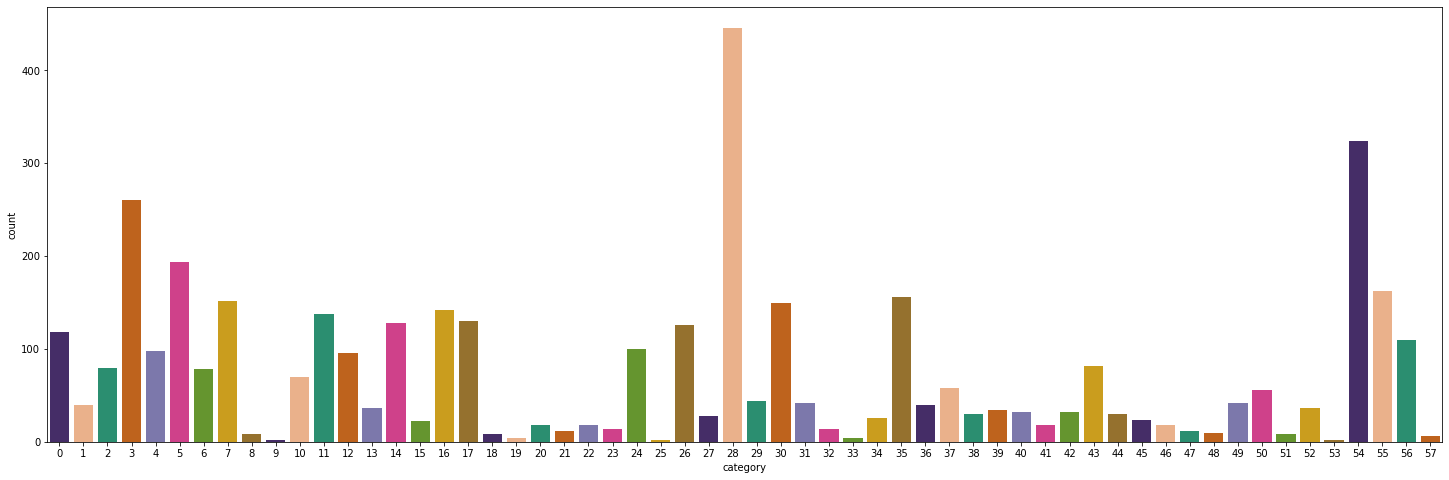

In [4]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(25, 8))

sns.countplot(trainDf.category, palette=['#432371',"#FAAE7B","#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D"])


In [5]:
data=[]
labels1=[]

for ip in os.listdir(data_path + '/TSRD-Train'):
    try:
        image=Image.open(data_path + '/TSRD-Train/' + ip)
        size_image = image.resize((30, 30))
        data.append(np.array(size_image))
        labels1.append(int(ip.split('_')[0]))

    except AttributeError:
        break
        
data=np.array(data)
labels1=np.array(labels1)

print(labels1)
print(data.shape,labels1.shape)

[16 36 17 ... 27 10 17]
(4170, 30, 30, 3) (4170,)


In [6]:
Xtrain,Xtest,ytrain,ytest=train_test_split(data,labels1,test_size=0.2,random_state=42)

In [7]:
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(3336, 30, 30, 3) (834, 30, 30, 3) (3336,) (834,)


In [8]:
ytrain=to_categorical(ytrain,58)
ytest=to_categorical(ytest,58)

In [9]:
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(3336, 30, 30, 3) (834, 30, 30, 3) (3336, 58) (834, 58)


In [10]:
filters = [3, 5, 9, 13]
model1 = [0] * len(filters)

for i in range(len(model1)):
    model1[i] = tf.keras.Sequential()
    model1[i].add(Conv2D(filters=32, kernel_size=filters[i], padding='same',activation='relu', input_shape=(30,30,3)))
    model1[i].add(MaxPooling2D(pool_size=2))
    model1[i].add(Flatten())
    model1[i].add(Dense(500, activation='relu'))
    model1[i].add(Dense(58, activation='softmax'))

    #Compilation of the model
    model1[i].compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])
    

In [11]:
epochs=5
annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))

In [12]:
history = [0] * len(model1)

for i in range(len(history)):
    history[i] = model1[i].fit(Xtrain, ytrain,
                        batch_size=5, epochs = 5,
                        validation_data = (Xtest, ytest),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f},validation accuracy={3:.5f}'.\
          format(filters[i], epochs, max(history[i].history['accuracy']),max(history[i].history['val_accuracy'])))
    print('training loss={0:.5f},validation loss={1:.5f}'.\
          format(max(history[i].history['loss']),max(history[i].history['val_loss'])))

Model with filters 3x3, epochs=5, training accuracy=0.98082,validation accuracy=0.96043
training loss=8.89843,validation loss=0.56833
Model with filters 5x5, epochs=5, training accuracy=0.95833,validation accuracy=0.96523
training loss=5.18493,validation loss=1.14606
Model with filters 9x9, epochs=5, training accuracy=0.81445,validation accuracy=0.83693
training loss=5.12006,validation loss=3.49065
Model with filters 13x13, epochs=5, training accuracy=0.11331,validation accuracy=0.12110
training loss=4.79659,validation loss=3.57040


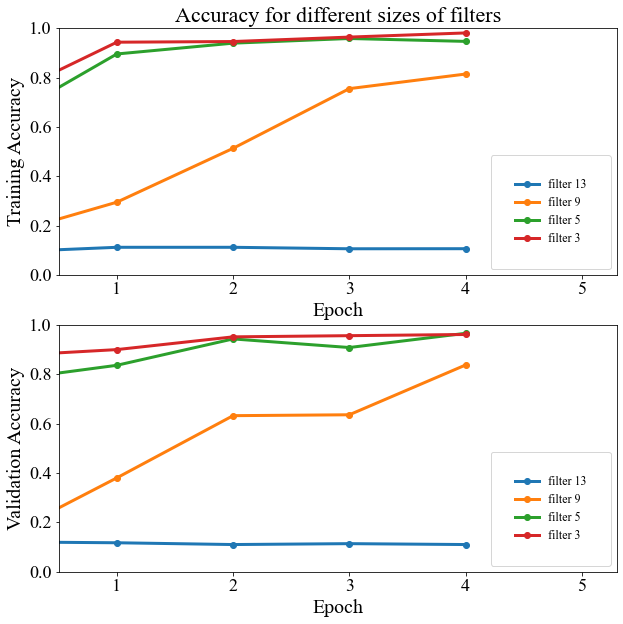

In [13]:
plt.rcParams['figure.figsize'] = (10.0, 10.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

# Figure 4.1.1 - Plotting history of training accuracy
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(history[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(history[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(history[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.00, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

# Figure 4.1.2 - Plotting history of validation accuracy
plt.subplot(2, 1, 2)
# plt.gca().set_title('Validation accuracy')
plt.plot(history[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(history[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(history[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(history[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.00, 1.0)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('models_accuracy.png')
plt.close()

In [14]:
for i in range(len(model1)):
    temp = model1[i].predict(Xtest)
    acc = np.sum(temp == ytest) / np.size(ytest)
    
    print('filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], acc))

filter 3 testing accuracy = 0.05379
filter 5 testing accuracy = 0.10463
filter 9 testing accuracy = 0.13413
filter 13 testing accuracy = 0.00006


In [15]:
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(58, activation='softmax'))

#Compiling of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [35]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 50
history1 = model.fit(Xtrain, ytrain, batch_size=64, epochs=epochs,validation_data=(Xtest, ytest),callbacks=[annealer])

Epoch 1/50
53/53 [==============================] - 4s 77ms/step - loss: 0.5487 - accuracy: 0.8498 - val_loss: 0.3335 - val_accuracy: 0.9041
Epoch 2/50
53/53 [==============================] - 4s 76ms/step - loss: 0.5308 - accuracy: 0.8492 - val_loss: 0.3235 - val_accuracy: 0.8993
Epoch 3/50
53/53 [==============================] - 4s 75ms/step - loss: 0.4816 - accuracy: 0.8546 - val_loss: 0.3144 - val_accuracy: 0.9029
Epoch 4/50
53/53 [==============================] - 4s 75ms/step - loss: 0.5015 - accuracy: 0.8561 - val_loss: 0.2985 - val_accuracy: 0.9089
Epoch 5/50
53/53 [==============================] - 4s 76ms/step - loss: 0.4729 - accuracy: 0.8687 - val_loss: 0.2942 - val_accuracy: 0.9137
Epoch 6/50
53/53 [==============================] - 4s 75ms/step - loss: 0.4685 - accuracy: 0.8660 - val_loss: 0.2917 - val_accuracy: 0.9077
Epoch 7/50
53/53 [==============================] - 4s 75ms/step - loss: 0.4593 - accuracy: 0.8642 - val_loss: 0.2772 - val_accuracy: 0.9173
Epoch 8/50
53

In [36]:
_,train_acc=model.evaluate(Xtrain,ytrain,verbose=0)
_,test_acc=model.evaluate(Xtest,ytest,verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.985, Test: 0.953


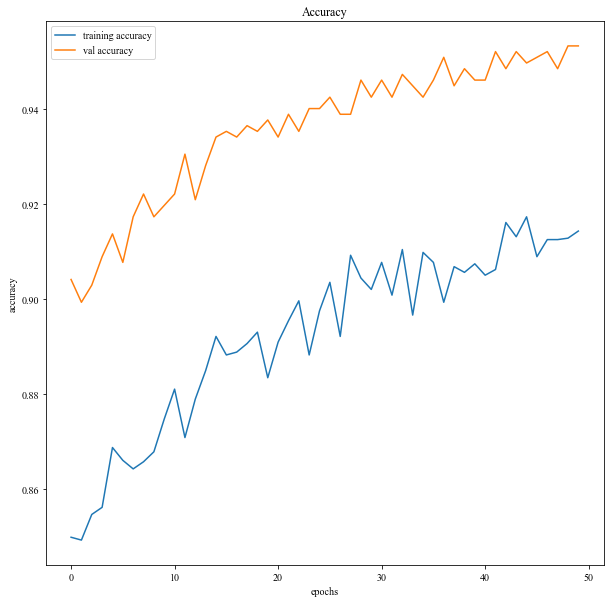

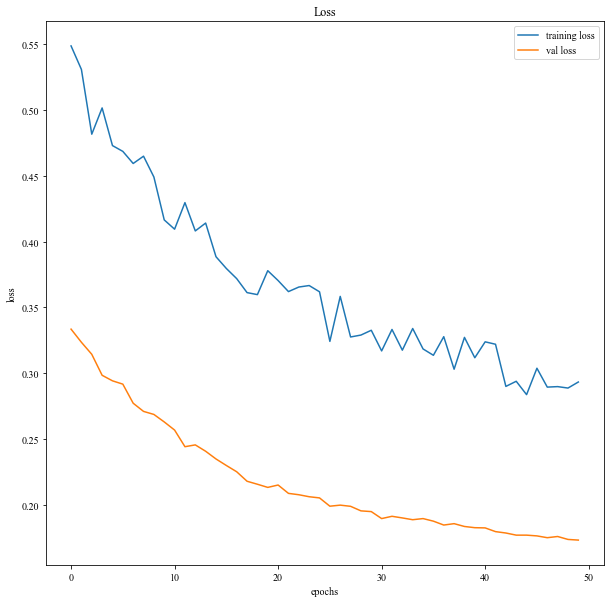

In [37]:
#Figure 4.2.1 - Plot to show changing accuracy with epochs
fig1=plt.figure(0)
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
fig1.savefig('Model_accuracy.png')

#Figure 4.2.2 - Plot to show changing loss with epochs
fig2=plt.figure(1)
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
fig2.savefig('Model_loss.png')

In [38]:
labels2=[]
data2=[]

for ip in os.listdir(data_path + '/TSRD-Test'):
    try:
        image=Image.open(data_path + '/TSRD-Test/' + ip)
        size_image = image.resize((30, 30))
        data2.append(np.array(size_image))
        labels2.append(int(ip.split('_')[0]))

    except AttributeError:
        break
        

X_test=np.array(data2)

In [39]:
predict_x=model.predict(X_test) 
pred_classes=np.argmax(predict_x,axis=1)
# pred_classes = model.predict(X_test)

In [40]:
# accuracy
print('Accuracy=',accuracy_score(labels2, pred_classes))

Accuracy= 0.6629889669007021


In [41]:
label_name=[labels2[i] for i in range(58)]
print(classification_report(labels2,pred_classes,label_name))

              precision    recall  f1-score   support

          26       0.98      0.91      0.95       134
          36       0.00      0.00      0.00        12
          26       0.98      0.91      0.95       134
          50       0.29      0.40      0.33        20
          54       0.91      1.00      0.95       176
          13       1.00      0.67      0.81        92
          14       1.00      0.83      0.91        12
          15       1.00      0.28      0.43        36
          54       0.91      1.00      0.95       176
          43       0.58      0.19      0.29       116
          30       0.57      0.71      0.63        34
          10       0.97      0.97      0.97        60
           5       0.44      0.28      0.34        50
           7       0.50      0.16      0.24        50
           5       0.44      0.28      0.34        50
          10       0.97      0.97      0.97        60
          15       1.00      0.28      0.43        36
          35       0.35    

/Users/satinsin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[26, 36, 26, 50, 54, 13, 14, 15, 54, 43, 30, 10, 5, 7, 5, 10, 15, 35, 35, 41, 28, 35, 5, 30, 26, 2, 26, 52, 13, 30, 55, 16, 11, 26, 16, 3, 16, 38, 43, 29, 43, 11, 15, 55, 13, 42, 35, 28, 6, 39, 15, 29, 44, 51, 4, 36, 54, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Confusion matrix, without normalization


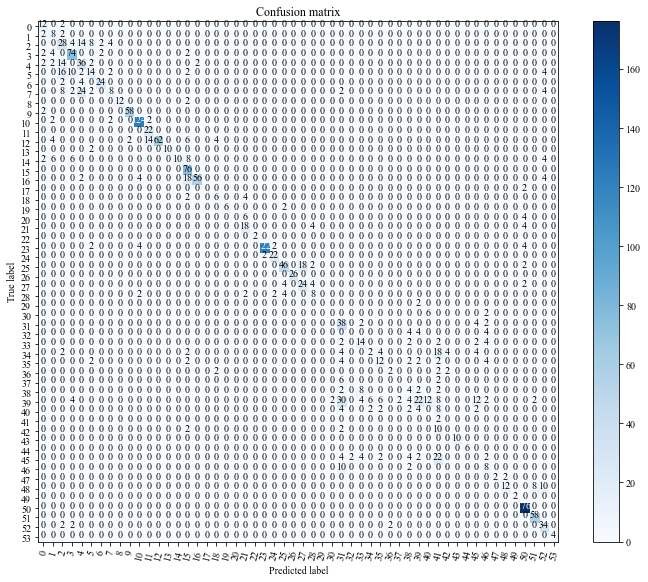

In [42]:
# Figure 4.2.3 - Confussion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(54)
cm = confusion_matrix(labels2,pred_classes)

plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [43]:
class_wise_acc = cm.diagonal()/cm.sum(axis=1) * 100 
class_acc = pd.DataFrame({'Class_Label':[class_names[i] for i in range(54)], 'Accuracy': class_wise_acc.tolist()}, 
                         columns = ['Class_Label', 'Accuracy'])
class_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='orange')

Class_Label,Accuracy
0,85.71
1,66.67
2,46.67
3,88.10
4,62.07
5,28.00
6,80.00
7,16.00
8,85.71
9,96.67


         filename  width  height  x1  y1  x2  y2  category  \
184  008_0009.png    114     102  26  20  86  81         8   

                               Path  
184  Chinese/TSRD-Test/008_0009.png  


           filename  width  height  x1  y1   x2  y2  category  \
287  012_0008_j.png    124     115  27  21  101  95        12   

                                 Path  
287  Chinese/TSRD-Test/012_0008_j.png  


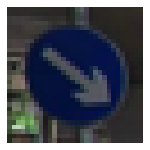

(1, 58)
ClassId: 26
Label: 27


In [69]:
a = 287

# Preparing image for test dataset
x_input = X_test[a:a+1]
#print(x_input.shape)
y_input = y_test[a:a+1]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

plt.show()

scores = model.predict(x_input)
print(scores.shape) 

prediction = np.argmax(scores)
print('ClassId:', prediction)

print('Label:', labels[prediction])